<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [3]:
!pip install pandas
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 108.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 203.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 120.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 129.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 82.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 152.6 MB/s eta 0:00:00


Import pandas module


In [5]:
import pandas as pd


Import matplotlib


In [12]:
import matplotlib.pyplot as plt


## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [13]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [14]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [15]:
# Display the first few rows to understand the structure
print("First few rows of the dataset:")
print(df.head())

# Step 2: Identify Duplicate Rows

# Count the number of duplicate rows
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")

# Step 3: Display the first few duplicate rows
# Display the first 5 rows that are duplicates
duplicate_rows = df[df.duplicated()]
print("\nFirst few duplicate rows:")
print(duplicate_rows.head())

First few rows of the dataset:
   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4  

### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [16]:
# Step 1: Identify duplicate rows based on selected columns ('MainBranch', 'Employment', 'RemoteWork')
selected_columns = ['MainBranch', 'Employment', 'RemoteWork']

# Find duplicates based on the selected columns
duplicates_based_on_columns = df[df.duplicated(subset=selected_columns)]

# Step 2: Analyze which columns frequently contain identical values within these duplicate rows
# Display the duplicate rows based on the selected columns
print("First few duplicate rows based on selected columns:")
print(duplicates_based_on_columns.head())

# Step 3: Analyze the characteristics of these duplicates
# Count the occurrences of each combination of 'MainBranch', 'Employment', and 'RemoteWork' in the duplicates
duplicates_summary = duplicates_based_on_columns[selected_columns].value_counts()

# Print the summary to see which combinations are most frequent in the duplicates
print("\nCount of duplicates based on selected columns:")
print(duplicates_summary)


First few duplicate rows based on selected columns:
    ResponseId                      MainBranch                 Age  \
1            2  I am a developer by profession     35-44 years old   
2            3  I am a developer by profession     45-54 years old   
14          15  I am a developer by profession     25-34 years old   
15          16  I am a developer by profession     45-54 years old   
16          17     I code primarily as a hobby  Under 18 years old   

             Employment                            RemoteWork   Check  \
1   Employed, full-time                                Remote  Apples   
2   Employed, full-time                                Remote  Apples   
14  Employed, full-time  Hybrid (some remote, some in-person)  Apples   
15  Employed, full-time  Hybrid (some remote, some in-person)  Apples   
16   Student, full-time                                   NaN  Apples   

                                     CodingActivities  \
1   Hobby;Contribute to open-so

### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


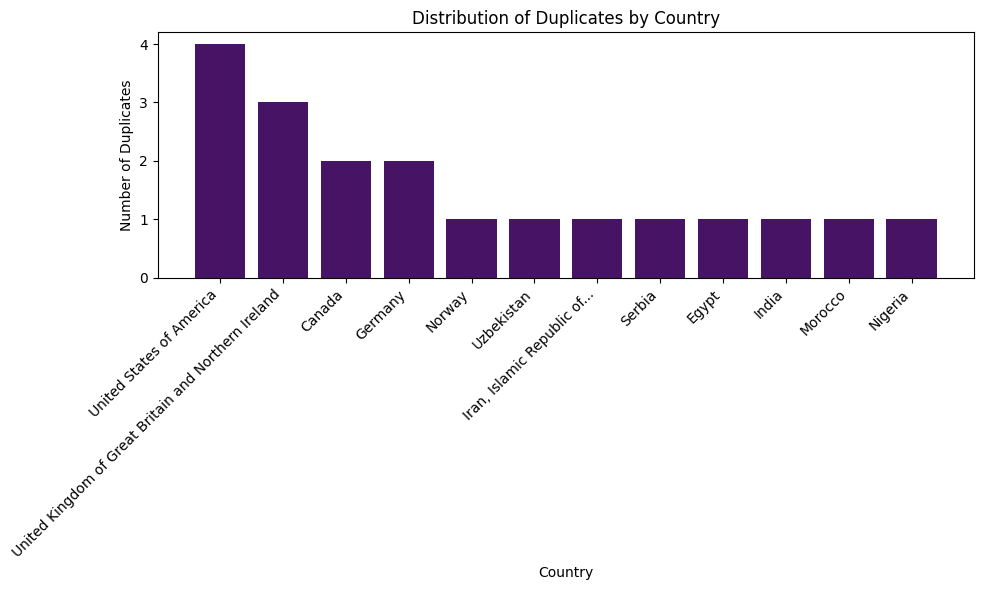

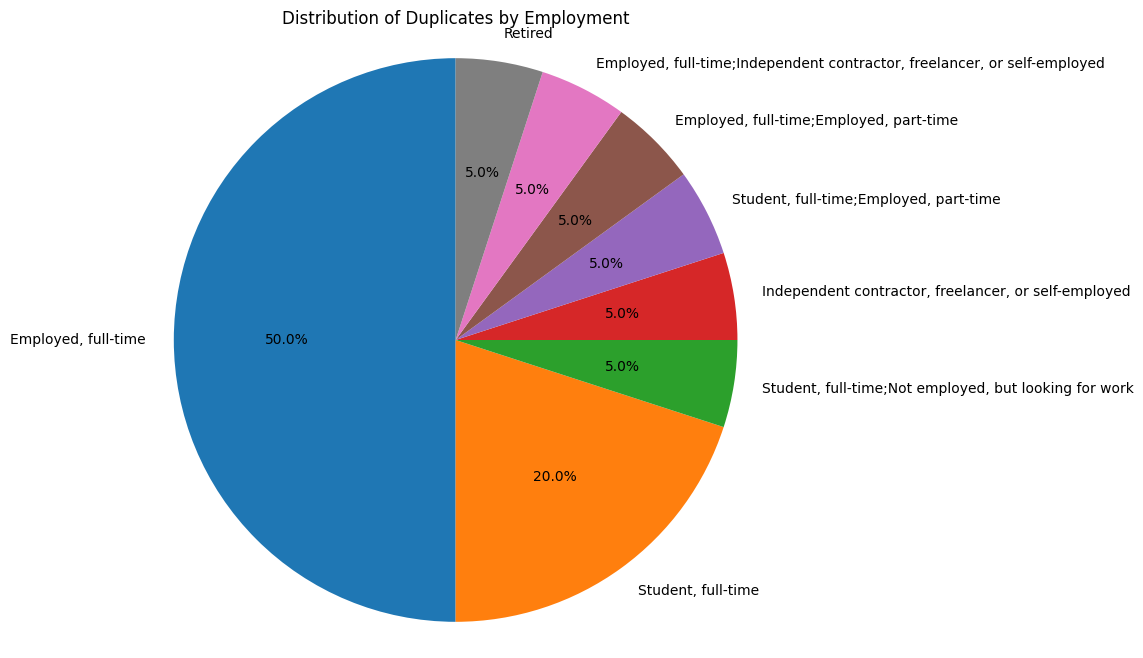

In [19]:
import matplotlib.pyplot as plt

# Step 1: Identify duplicate rows across the entire dataset
duplicates_all = df[df.duplicated()]

# Step 2: Visualize the distribution of duplicates by 'Country' using a bar chart
plt.figure(figsize=(10, 6))

# Count the duplicates by Country
country_duplicates = duplicates_all['Country'].value_counts()

# Create a bar chart for the duplicates by Country with a valid color palette
plt.bar(country_duplicates.index, country_duplicates.values, color=plt.cm.viridis(len(country_duplicates)))

plt.title('Distribution of Duplicates by Country')
plt.xlabel('Country')
plt.ylabel('Number of Duplicates')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Step 3: Visualize the distribution of duplicates by 'Employment' using a pie chart
employment_duplicates = duplicates_all['Employment'].value_counts()

# Create a pie chart for the duplicates by Employment
plt.figure(figsize=(8, 8))
plt.pie(employment_duplicates, labels=employment_duplicates.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Duplicates by Employment')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()



### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [20]:
# Step 1: Identify which columns are critical for defining uniqueness
# We assume that 'MainBranch', 'Employment', and 'RemoteWork' can help define a unique entry

columns_to_consider = ['MainBranch', 'Employment', 'RemoteWork']

# Step 2: Remove duplicates based on these selected columns
df_unique = df.drop_duplicates(subset=columns_to_consider)

# Step 3: Display the number of duplicates removed and the updated dataframe
duplicates_removed = len(df) - len(df_unique)
print(f"Number of duplicates removed: {duplicates_removed}")

# Display the first few rows of the updated dataframe
print("Updated DataFrame after removing duplicates based on selected columns:")
print(df_unique.head())


Number of duplicates removed: 64896
Updated DataFrame after removing duplicates based on selected columns:
   ResponseId                                         MainBranch  \
0           1                     I am a developer by profession   
3           4                              I am learning to code   
4           5                     I am a developer by profession   
5           6                        I code primarily as a hobby   
6           7  I am not primarily a developer, but I write co...   

                  Age           Employment RemoteWork   Check  \
0  Under 18 years old  Employed, full-time     Remote  Apples   
3     18-24 years old   Student, full-time        NaN  Apples   
4     18-24 years old   Student, full-time        NaN  Apples   
5  Under 18 years old   Student, full-time        NaN  Apples   
6     35-44 years old  Employed, full-time     Remote  Apples   

               CodingActivities  \
0                         Hobby   
3                      

## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
